## Modelagem Preditiva Avançada
### Regressão Logística

Feature	| Descrição	| Tipo
-----|----|----
ADMIT	| Adimissão para mestrado	| Flag
GPA	| Médias das notas do aluno	| Real
GRE	| Nota no exame de registro de graduação| Real
RANK |	Posição final no rank | Categorico


1° Passo

Primeiramente vamos importar os seguinter pacotes:

+ **caret**: Biblioteca para funcionalidade de ML

+ **mlbench**: Biblioteca para Validação de Modelos

+ **ggplot2**: Biblioteca para visualização de dados

+ **pROC**: Curva ROC

+ **ROCR**: Curva ROC

## Importando Bibliotecas e Dados

In [1]:
options(warn=-1)
library(caret)
library(datasets)
library(mlbench)
library(ggplot2)

library(pROC)
library(ROCR)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



2° Passo

Agora vamos carregar o dataset, com cabeçalho (header=TRUE) e o separador de colunas sendo ','.

## Análise de Dados

In [2]:
df <- read.csv(file="C:/Users/01549098/Documents/Analise_Preditiva_Avancada/Logisitc Regression/SAT.csv", header=TRUE, sep=",")

3° Passo

Agora vamos fazer uma rápida análise dos dados buscando identificar algumas relações visualmente e também verificar a qualidade dos dados.

In [3]:
head(df)

ADMIT,GRE,GPA,RANK
No,380,3.61,3
Yes,660,3.67,3
Yes,800,4.00,1
Yes,640,3.19,4
No,520,2.93,4
Yes,760,3.00,2


In [4]:
summary(df)

 ADMIT          GRE             GPA             RANK      
 No :273   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 Yes:127   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
           Median :580.0   Median :3.395   Median :2.000  
           Mean   :587.7   Mean   :3.390   Mean   :2.485  
           3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
           Max.   :800.0   Max.   :4.000   Max.   :4.000  

4° Passo

Agora vamos particionar o dataset em treino/teste. Para isso definimos "p=0.7", isto é 70% da base será escolhida aleatóriamente para treino e 30% para teste do modelo.

Observe também que o "set.seed(x)" garante que ao replicarmos essa partição em outro computador por exemplo, os mesmos dados irão respectivamente prar treino e teste

In [5]:
set.seed(280)
trainIndex <- createDataPartition(df$ADMIT, p = .7, list = FALSE)

df$ADMIT <- as.factor(df$ADMIT)

In [6]:
dfTrain <- df[ trainIndex,]
dfTest  <- df[-trainIndex,]

5° Passo

Observe que em "method" definimos "glm" de generalized linear model e que definimos variável target sendo APPROVED e colocamos todas as outras variáveis como preditoras. Observe também que agora incluímos o parâmetro de 10 fold cross validation na hora do treino do modelo

In [7]:
set.seed(130)
options(warn=-1)
cv <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE,
                  summaryFunction=twoClassSummary, classProbs = TRUE)


model <- train(ADMIT~., data = dfTrain, method = "glm", 
                   metric="ROC",trControl = cv, control = list(maxit = 50))

6° Passo

Chamando o modelo obtemos informações como:

Número de amostras no treino

Número de features preditoras

Sensitividade e Specificidade do Modelo

In [8]:
model

Generalized Linear Model 

281 samples
  3 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 254, 252, 253, 253, 253, 253, ... 
Resampling results:

  ROC       Sens       Spec 
  0.687924  0.9271053  0.225


7° Passo

Abaixo agora vamos obter os coeficientes do modelo, isto é:

z=α1(X1)+α2(X2)+α3(X3).... 
z=α1(RANK)+α2(GPA)+α3(GRE).... 
Pr(Approved=Yes)=1/1+e−z

In [9]:
dfPred <- predict(model, newdata=dfTest)

8° Passo

Adicionando matriz de confusão para validação do modelo logístico.

## Matriz de Confusão

In [10]:
confusionMatrix(data=dfPred, dfTest$ADMIT)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  77  33
       Yes  4   5
                                          
               Accuracy : 0.6891          
                 95% CI : (0.5977, 0.7707)
    No Information Rate : 0.6807          
    P-Value [Acc > NIR] : 0.4656          
                                          
                  Kappa : 0.1031          
                                          
 Mcnemar's Test P-Value : 4.161e-06       
                                          
            Sensitivity : 0.9506          
            Specificity : 0.1316          
         Pos Pred Value : 0.7000          
         Neg Pred Value : 0.5556          
             Prevalence : 0.6807          
         Detection Rate : 0.6471          
   Detection Prevalence : 0.9244          
      Balanced Accuracy : 0.5411          
                                          
       'Positive' Class : No              
                                 

9° Passo

Agora podemos fazer o score do modelo na base de teste e obter as probabilidades de cada classe de acordo com o modelo

In [11]:
dfProbs <- predict(model, newdata=dfTest, type="prob")
head(dfProbs)

,No,Yes
1,0.8271321,0.17286794
3,0.2800864,0.71991358
7,0.6276584,0.37234161
8,0.8027905,0.19720954
18,0.9226343,0.07736572
20,0.4735969,0.52640312


10° Passo

Agora usando a biblioteca pROC vamos fazer um plot da curva ROC

Setting direction: controls > cases


Area under the curve: 0.6957

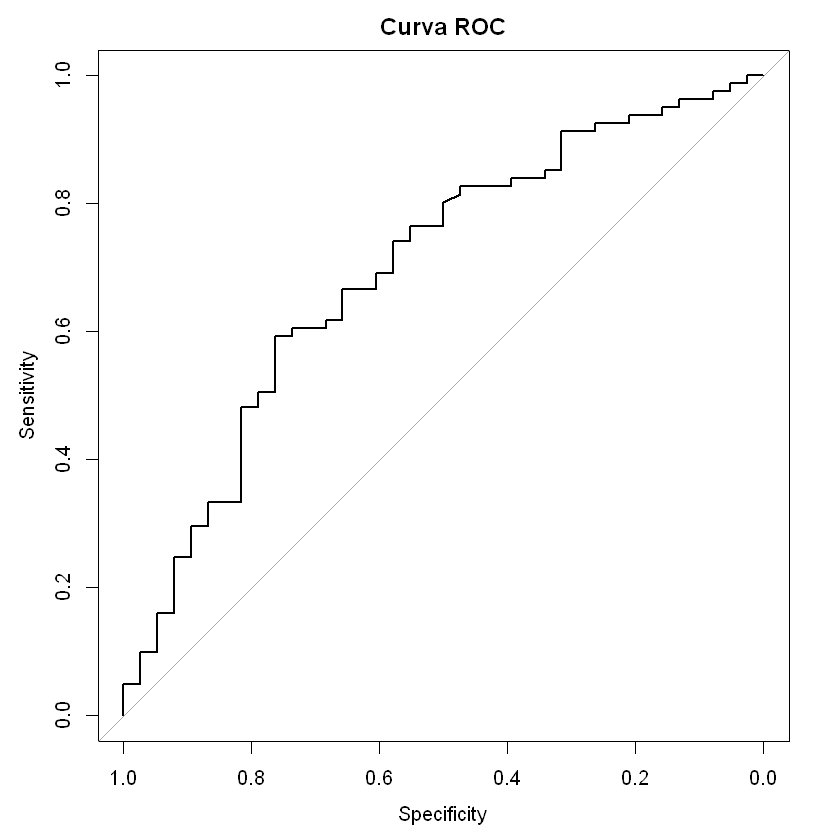

In [12]:
gbm.ROC <- roc(predictor=dfProbs$Yes,
               response=dfTest$ADMIT,
               levels=rev(levels(dfTest$ADMIT)))

gbm.ROC$auc
plot(gbm.ROC,main="Curva ROC")

11° Passo

Utilizando a função VarImp do mlbench e plotando sua tabela vemos em oredem as features mais importantes do modelos

ROC curve variable importance

     Importance
RANK     0.6348
GPA      0.6299
GRE      0.6184

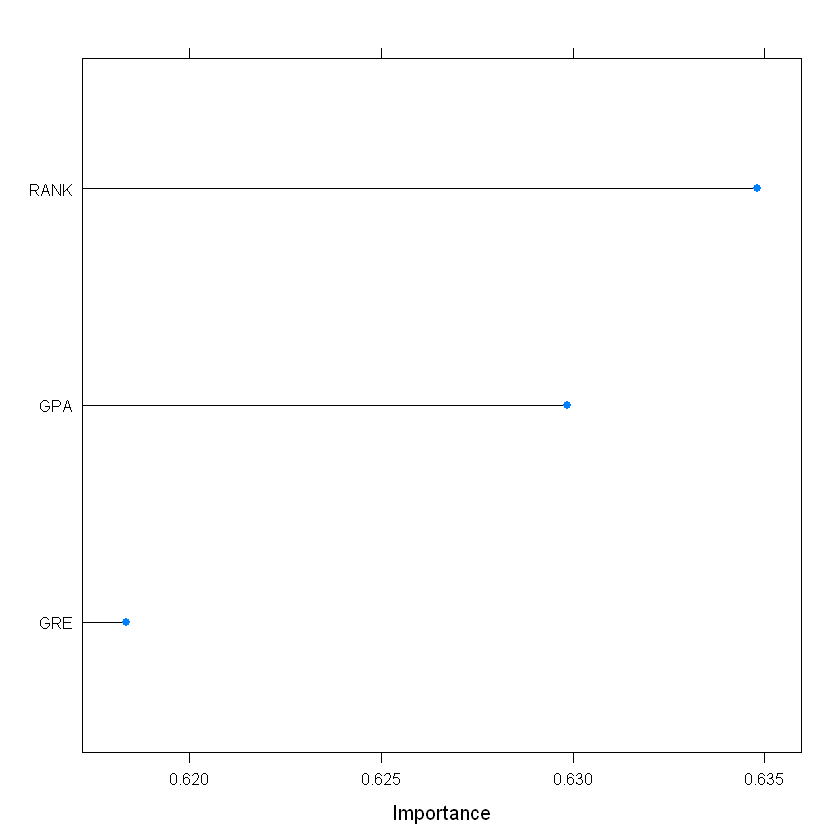

In [13]:
imp <- varImp(model, useModel=FALSE, scale=FALSE)
imp
plot(imp)